In [6]:
from sympy import solve
from sympy.abc import x, y, z
import numpy as np
import sys
import os
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR+"/../src")
from FIS_explainer import fis_explainer
from feature_importance_helper import *
from general_utilities import *
from visulizer import *

In [11]:
# Define a function with interaction (x_1 + x_2 + x_1*x_2 -3)^2 = 0, considering a particular dataset X=(1,1) y=(0)
f = (3-(y*z+y+z))**2

In [13]:
# Perturbing x_1, x_2 within the dominant boundary e, where e = 0.1, indicating the loss tolerance
# we set sub-dominant boundary i * e = [0, 0.1]
e = np.arange(0, 0.11, 0.01)
m = [solve((2-x*2)**2-i, x) for i in e]

In [14]:
# sum of main effects that achieve e=0.1 can be found by 9 pairs
sum_to_one = find_all_sum_to_one_pairs(2)
quadrants = {0: [0, 0], 1: [0, 1], 2: [1, 1], 3: [1, 0]}
sum_to_one

[(5, 5), (3, 7), (4, 6), (6, 4), (7, 3), (8, 2), (9, 1), (1, 9), (2, 8)]

In [15]:
# calculate joint effects of all 36 possibilities
joint_effect_all = []
for idxk, sum in enumerate(sum_to_one):
    for idxq, quadrant in enumerate(quadrants):
        # for each pair, find the main effect
        joint_effect = f.subs({y:m[sum[0]][quadrants[quadrant][0]], z: m[sum[-1]][quadrants[quadrant][-1]]})
        joint_effect_all.append(joint_effect)
joint_effect_all

[0.188975910112501,
 0.000156250000000000,
 0.211336589887499,
 0.000156249999999994,
 0.181751959106029,
 0.00638618524098902,
 0.201813568692205,
 0.0105732869607774,
 0.187230610225761,
 0.00106938977423923,
 0.209028569196894,
 0.00327143080310649,
 0.187230610225761,
 0.00327143080310647,
 0.209028569196894,
 0.00106938977423924,
 0.181751959106029,
 0.0105732869607773,
 0.201813568692205,
 0.00638618524098909,
 0.171614718625761,
 0.0229284271247460,
 0.188585281374238,
 0.0172715728752537,
 0.154056250000000,
 0.0430562499999999,
 0.166056250000000,
 0.0370562499999999,
 0.154056250000000,
 0.0370562500000001,
 0.166056250000000,
 0.0430562500000001,
 0.171614718625761,
 0.0172715728752538,
 0.188585281374238,
 0.0229284271247461]

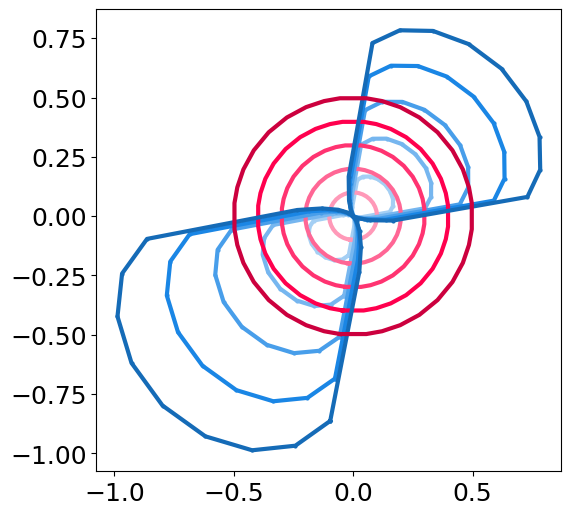

In [7]:
# further divide e into 5 sub es and each sub-e is represented by a circle
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
for idx, i in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    e = np.arange(0, i+0.1*(idx+1), 0.01*(idx+1))
    sum_to_one = find_all_sum_to_one_pairs(2)
    lightness = [0.8, 0.7, 0.6, 0.5, 0.4]
    quadrants = {0: [0, 0], 1: [0, 1], 2: [1, 1], 3: [1, 0]}
    m = [solve((2-x*2)**2-i, x) for i in e]
    f = (3-(y*z+y+z))**2
    joint_effect_all = []
    for idxk, sum in enumerate(sum_to_one):
        for idxq, quadrant in enumerate(quadrants):
            # for each pair, find the main effect
            joint_effect = f.subs({y:m[sum[0]][quadrants[quadrant][0]], z: m[sum[-1]][quadrants[quadrant][-1]]})
            joint_effect_all.append(joint_effect)
    circle_emp, circle_exp = pairwise_vis_loss(joint_effect_all, i)
    circle_emp.sort(key=lambda c:np.arctan2(np.float64(c[0]),np.float64(c[1])))
    circle_emp.append(circle_emp[0])
    circle_exp.sort(key=lambda c:np.arctan2(c[0], c[1]))
    circle_exp.append(circle_exp[0])
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.plot(np.array(circle_emp)[:,0], np.array(circle_emp)[:,1],color=colors_vis(0, lightness[idx]), marker='o', linewidth=3, markersize=2, label='emperial interaction')
    ax.plot(np.array(circle_exp)[:,0], np.array(circle_exp)[:,1],color=colors_vis(1, lightness[idx]), linewidth=3, markersize=1, label='expected interaction')